# NETFLIX DATA ANALYSIS

In [383]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [384]:
#Read the dataset
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df_bkp=netflix_df.copy()
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Exploratory Data Analysis: Data Cleaning and Wrangling

In [385]:
#Check if the columns have NULL values
netflix_df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [386]:
#Replace NULL with No Data
netflix_df['director'] = netflix_df['director'].fillna('No Data')
netflix_df['cast'] = netflix_df['cast'].fillna('No Data')

In [387]:
#Replace NULL with the MODE value of the respective columns
netflix_df["date_added"] = netflix_df["date_added"].fillna(netflix_df["date_added"].mode()[0])
netflix_df['country'] = netflix_df['country'].fillna(netflix_df["country"].mode()[0])

In [388]:
#Drop the remaining NULL holding rows: rating and duration
netflix_df.dropna(inplace=True)

#Drop description column as it's not needed
netflix_df = netflix_df.drop(['description'], axis = 1)

#Check if all NULL values are removed
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [389]:
#Check the summary
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   director      8800 non-null   object
 4   cast          8800 non-null   object
 5   country       8800 non-null   object
 6   date_added    8800 non-null   object
 7   release_year  8800 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8800 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.0+ KB


In [390]:
#Use the date_added column to separate out the month name and year to use it for plots
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['month_name_added']=netflix_df['date_added'].dt.month_name()
netflix_df['year_added'] = netflix_df['date_added'].dt.year

#Rename listed_in column as genre for better readability
netflix_df = netflix_df.rename(columns={"listed_in":"genre"})
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",11,November,2019
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",7,July,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",11,November,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",1,January,2020


In [391]:
#Split the dataset into TV show and Movies to aid in further data visualization
netflix_tvshows_df = netflix_df[netflix_df['type']=='TV Show']
netflix_movies_df = netflix_df[netflix_df['type']=='Movie']

#### Count and Distribution of contents (TV Shows and Movies) released every year

2018    1147
2019    1030
2017    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64


<AxesSubplot:title={'center':'Distribution of TV Shows and Movies released Year-wise'}, xlabel='release_year', ylabel='Density'>

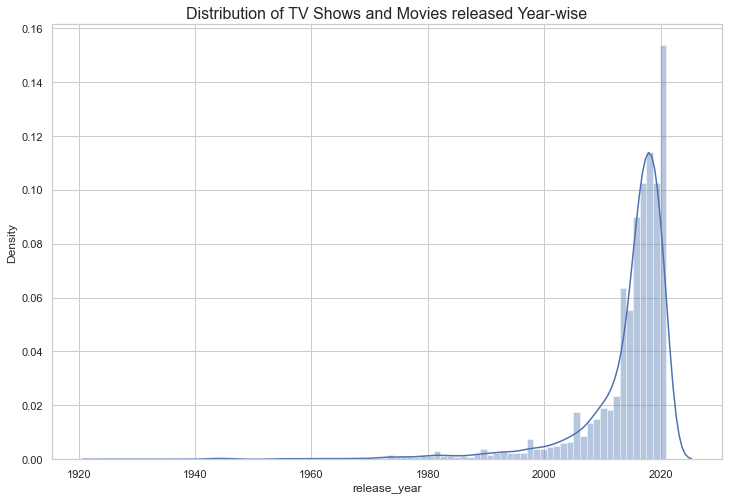

In [392]:
#Content released per year
netflix_data_release = netflix_df.groupby("release_year").count().sort_values(ascending = False, by = "show_id")[0:10]
netflix_data_release.drop(netflix_data_release.iloc[:,1:13],1,inplace=True)
netflix_data_release = netflix_data_release.rename(columns={"show_id":"no_of_content"})
netflix_data_release

#Distribution of tv shows/movies released yearly
print(netflix_df["release_year"].value_counts())

plt.figure(figsize = (12,8))
plt.title("Distribution of TV Shows and Movies released Year-wise", size=16)
sns.distplot(netflix_df['release_year'], bins = 84)

## Data Visualization

#### Percentage of TV Shows and Movies on Netflix

In [393]:
#Function to perform calcualtion for pie chart
def func(pct, total):
    absolute = int(pct / 100.*np.sum(total))
    return "{:.1f}%\n({:d})".format(pct, absolute)

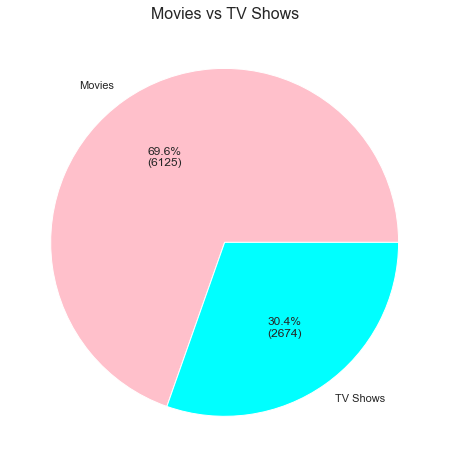

In [394]:
#TV Shows vs Movies Pie Chart
total = netflix_movies_df.type.count()+ netflix_tvshows_df.type.count()
data = [netflix_movies_df.type.count(), netflix_tvshows_df.type.count()]
label = ["Movies", "TV Shows"]
color = ["pink","cyan"]
fig, ax = plt.subplots(figsize=(8, 8))

plt.pie(data, labels=label,colors=color,autopct=lambda pct: func(pct, total))
plt.title("Movies vs TV Shows", size=16)
plt.show()

#### Analysis on Rating for TV Shows

TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64


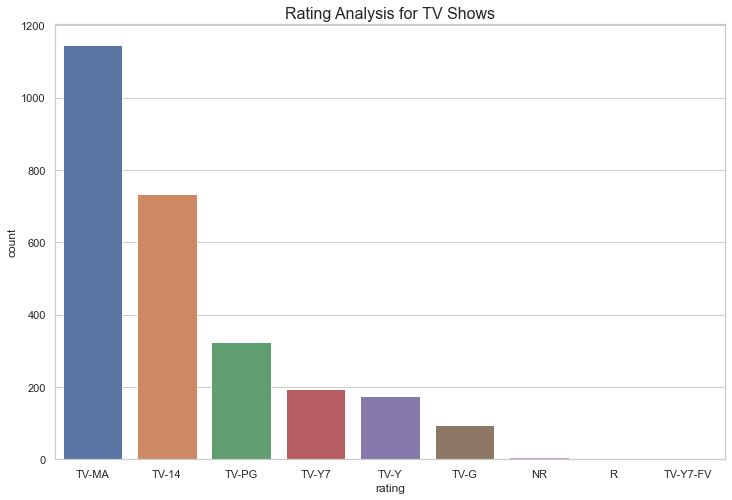

In [395]:
#Analysis on Rating for TV Shows
print(netflix_tvshows_df["rating"].value_counts()[:10])

plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
plt.title("Rating Analysis for TV Shows",size=16)
ax = sns.countplot(x="rating", data=netflix_tvshows_df, order=netflix_tvshows_df['rating'].value_counts().index[0:20])

#### Year-wise TV Shows Released

2020    436
2019    397
2018    380
2021    315
2017    265
2016    244
2015    161
2014     88
2012     64
2013     62
2010     40
2011     40
2009     34
2008     23
2006     14
2007     14
2005     13
2003     10
2004      9
1999      7
Name: release_year, dtype: int64


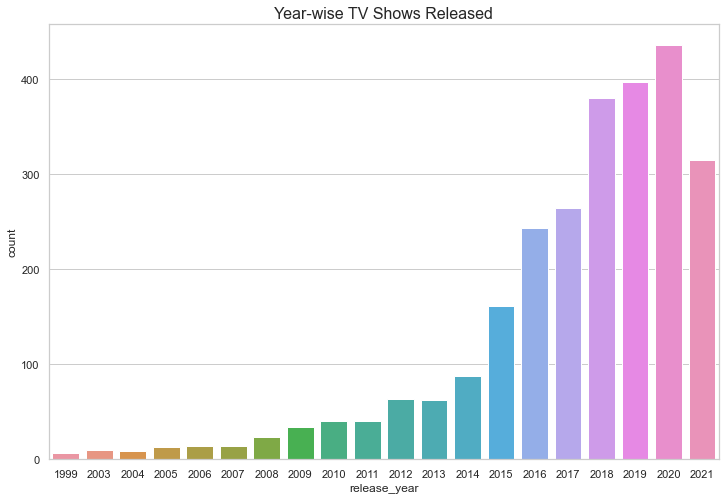

In [396]:
#Analysis on Year-wise TV Shows
print(netflix_tvshows_df["release_year"].value_counts()[:20])

plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
plt.title("Year-wise TV Shows Released",size=16)
ax = sns.countplot(x="release_year", data=netflix_tvshows_df, order=netflix_tvshows_df['release_year'].value_counts().index[0:20].sort_values())

In [397]:
#Replace Seasons and Season word in duration column with spaces for better analysis
netflix_tvshows_df['duration']=netflix_tvshows_df['duration'].str.replace(' Seasons',' ')
netflix_tvshows_df['duration']=netflix_tvshows_df['duration'].str.replace(' Season',' ')
netflix_tvshows_df['duration']=netflix_tvshows_df['duration'].astype(str).astype(float)
netflix_tvshows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,month_added,month_name_added,year_added
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1.0,"TV Dramas, TV Horror, TV Mysteries",9,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,No Data,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2.0,"Anime Series, Kids' TV",5,May,2018
8796,s8797,TV Show,Yunus Emre,No Data,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2.0,"International TV Shows, TV Dramas",1,January,2017
8797,s8798,TV Show,Zak Storm,No Data,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3.0,Kids' TV,9,September,2018
8800,s8801,TV Show,Zindagi Gulzar Hai,No Data,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1.0,"International TV Shows, Romantic TV Shows, TV ...",12,December,2016


#### Top 10 TV Shows having maximum no. of seasons

                       title  no_of_seasons
548           Grey's Anatomy           17.0
2423            Supernatural           15.0
4798                    NCIS           15.0
1354               Heartland           13.0
4220  COMEDIANS of the world           13.0
7847            Red vs. Blue           13.0
4964       Trailer Park Boys           12.0
5412          Criminal Minds           12.0
6795                 Frasier           11.0
6456                  Cheers           11.0


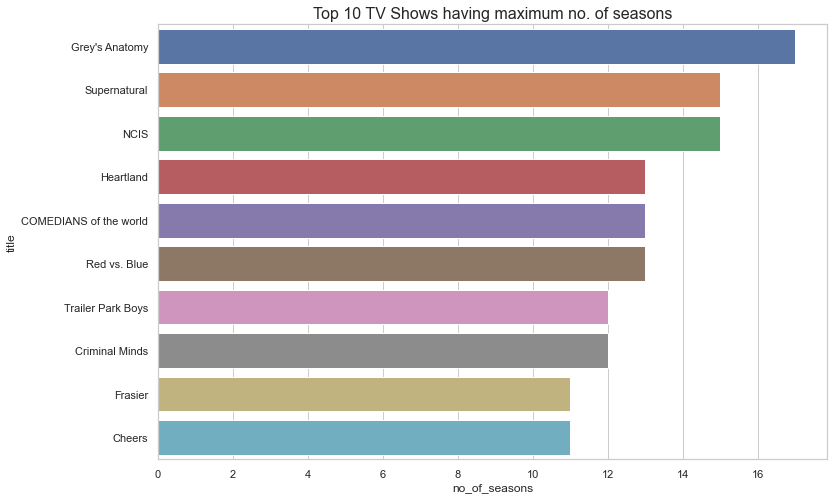

In [398]:
#Top 10 TV Shows with maximum number of seasons
features=['title','duration']
no_of_seasons_df= netflix_tvshows_df[features]

no_of_seasons_df['no_of_seasons']=no_of_seasons_df['duration']

top_features=['title','no_of_seasons']
top=no_of_seasons_df[top_features]

top=top.sort_values(by='no_of_seasons', ascending=False)

top10=top[0:10]
print(top10)

plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
plt.title("Top 10 TV Shows having maximum no. of seasons",size=16)
ax = sns.barplot(y="title", x='no_of_seasons',data=top10)

#### Top 10 Genres of TV Shows

Kids' TV                                                  220
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      98
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       87
Docuseries                                                 85
TV Comedies                                                69
Name: genre, dtype: int64


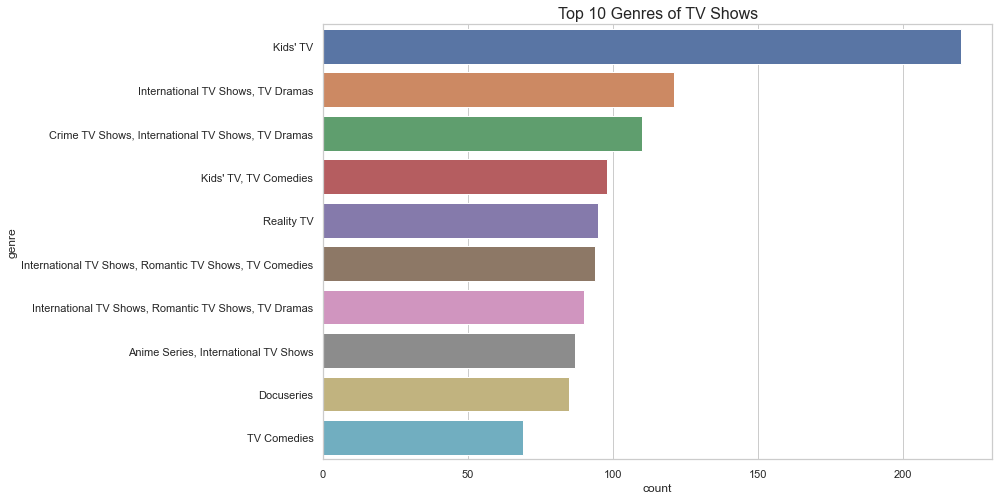

In [399]:
#Top 10 Genre of TV Shows
print(netflix_tvshows_df["genre"].value_counts()[:10])

plt.figure(figsize=(12,8))
sns.countplot(y = 'genre',data = netflix_tvshows_df, order = netflix_tvshows_df["genre"].value_counts().index[0:10])

plt.title("Top 10 Genres of TV Shows", size=16)
plt.show()

#### Word Cloud of TV Shows' Genres

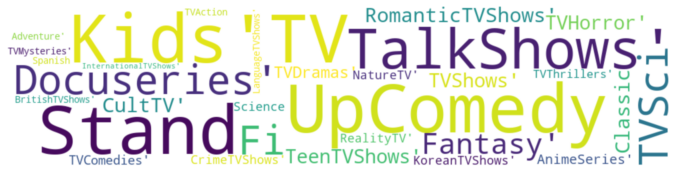

In [400]:
#Word CLoud of TV Show Genres
from collections import Counter

genres = list(netflix_tvshows_df['genre'])
gen=[]

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
        
g = Counter(gen)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (12,12)

#assigning shape to the word cloud
mask = np.array(Image.open('NT.png'))
wordcloud = WordCloud(max_words=1000,background_color="white",mask=mask).generate(str(text))

plt.imshow(wordcloud,interpolation="quadric")
plt.axis("off")
plt.show()

#### Analysis on Rating for Movies

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64


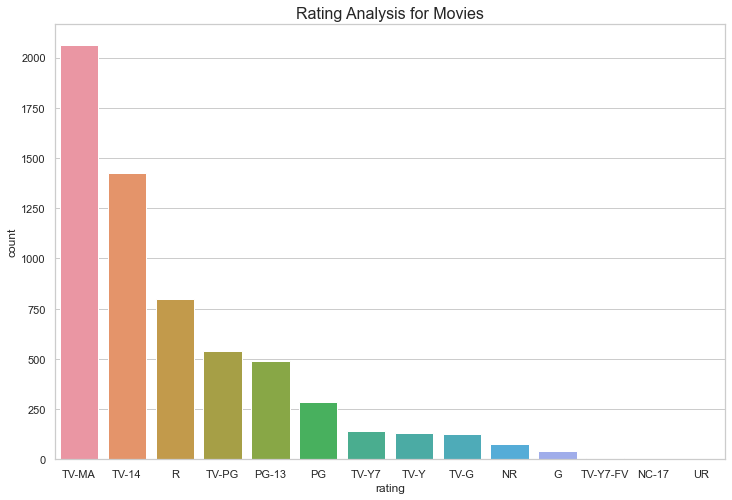

In [401]:
##Analysis on Rating for Movies
print(netflix_movies_df["rating"].value_counts()[:20])

plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
plt.title("Rating Analysis for Movies", size=16)
ax = sns.countplot(x="rating", data=netflix_movies_df, order=netflix_movies_df['rating'].value_counts().index[0:20])

#### Year-wise Movies Released

2018    767
2017    765
2016    658
2019    633
2020    517
2015    396
2021    277
2014    264
2013    225
2012    173
2010    153
2011    145
2009    118
2008    113
2006     82
2007     74
2005     67
2004     55
2003     51
2002     44
Name: release_year, dtype: int64


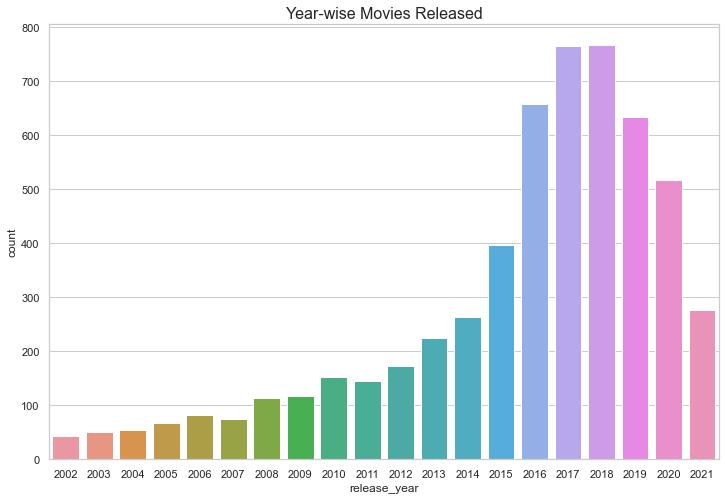

In [402]:
#Year-wise analysis on Movies 
print(netflix_movies_df["release_year"].value_counts()[:20])

plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
plt.title("Year-wise Movies Released", size=16)
ax = sns.countplot(x='release_year', data=netflix_movies_df, order=netflix_movies_df['release_year'].value_counts().index[0:20].sort_values())

In [403]:
#Remove the unit from duration columnn
netflix_movies_df['duration']=netflix_movies_df['duration'].str.replace(' min','')
netflix_movies_df['duration']=netflix_movies_df['duration'].astype(str).astype(float)
netflix_movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90.0,Documentaries,9,September,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91.0,Children & Family Movies,9,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies",9,September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"Comedies, Dramas",9,September,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"Dramas, International Movies",9,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96.0,"Dramas, International Movies, Thrillers",3,March,2016
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158.0,"Cult Movies, Dramas, Thrillers",11,November,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88.0,"Comedies, Horror Movies",11,November,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"Children & Family Movies, Comedies",1,January,2020


#### Duration of Movies in minutes

90.0    152
94.0    146
97.0    146
93.0    146
91.0    144
       ... 
17.0      3
21.0      3
12.0      3
15.0      3
20.0      2
Name: duration, Length: 158, dtype: int64


<AxesSubplot:title={'center':'Duration of Movies'}, xlabel='duration', ylabel='Density'>

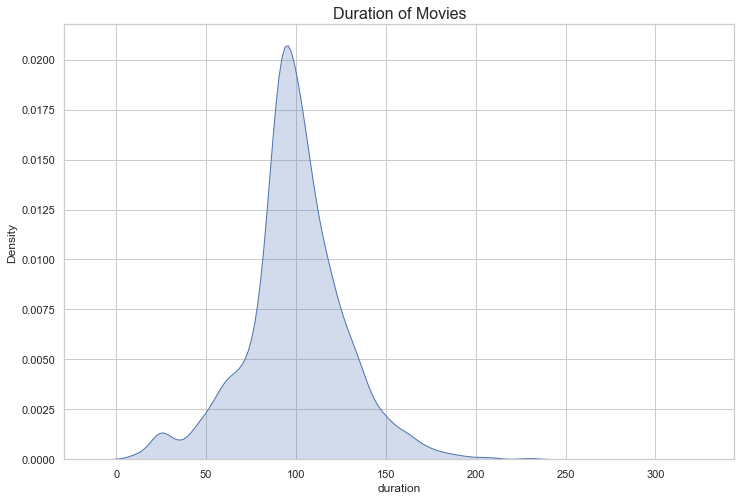

In [404]:
#Duration of Netflix Movies
print(netflix_movies_df["duration"].value_counts()[:20])

plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
plt.title("Duration of Movies", size=16)
sns.kdeplot(data=netflix_movies_df['duration'], shade=True)

#### Top 10 Genres of Movies

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Name: genre, dtype: int64


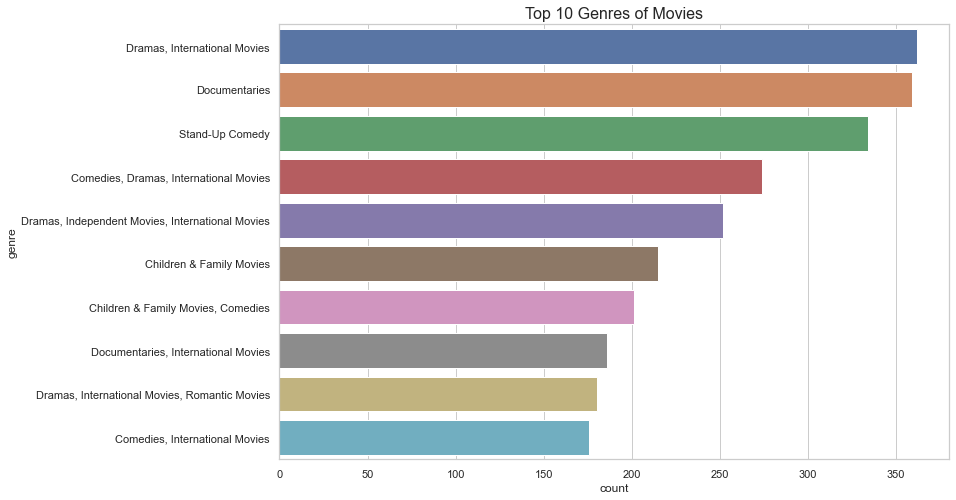

In [405]:
#Top 10 genres of Movies
print(netflix_movies_df["genre"].value_counts()[:10])

plt.figure(figsize=(12,8))
sns.countplot(y = 'genre',data = netflix_movies_df, order = netflix_movies_df["genre"].value_counts().index[0:10])
plt.title("Top 10 Genres of Movies", size=16)
plt.show()

#### Word Cloud of Movies' Genres

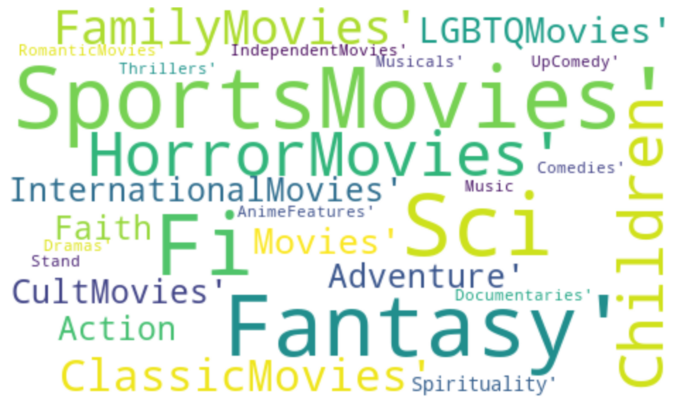

In [406]:
#Word CLoud of Movies Genres
from collections import Counter

genres = list(netflix_movies_df['genre'])
gen=[]

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
        
g = Counter(gen)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (12,12)

#assigning shape to the word cloud
mask = np.array(Image.open('C.jfif'))
wordcloud = WordCloud(max_words=10000000,background_color="white",mask=mask).generate(str(text))

plt.imshow(wordcloud,interpolation="quadric")
plt.axis("off")
plt.show()

In [407]:
#TV Shows/movies can be created in multiple countries depending on the language. So, pick just 1st country from the list
#of countries. 
netflix_df['first_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['count'] = 1
data = netflix_df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

#### Top 10 content creating countries

United States     4038
India             1008
United Kingdom     628
Canada             271
Japan              258
France             212
South Korea        211
Spain              181
Mexico             134
Australia          116
Name: first_country, dtype: int64


<AxesSubplot:title={'center':'Top 10 content creating countries'}, xlabel='count', ylabel='first_country'>

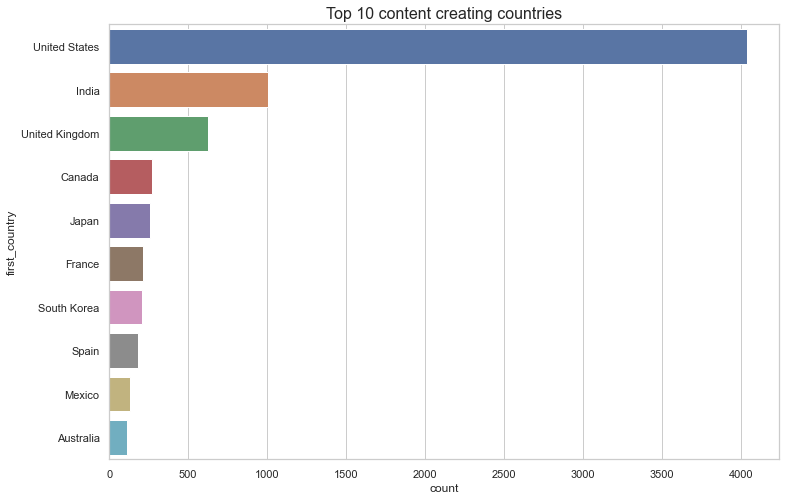

In [408]:
#Top 10 content creating countries
print(netflix_df["first_country"].value_counts()[:10])

plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
plt.title("Top 10 content creating countries",size=16)
sns.barplot(y=data.index, x=data)    

#### Distribution of Movies and TV shows watched by the Top 10 Country contributors

United States     4038
India             1008
United Kingdom     628
Canada             271
Japan              258
France             212
South Korea        211
Spain              181
Mexico             134
Australia          116
Name: first_country, dtype: int64


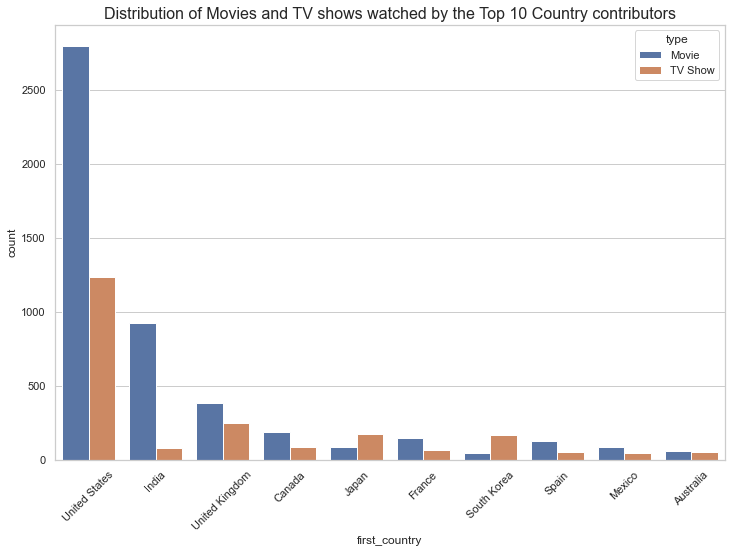

In [409]:
#Distribution of movies/tv shows watched in the top country contributors
print(netflix_df["first_country"].value_counts()[0:10])

plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
plt.title("Distribution of Movies and TV shows watched by the Top 10 Country contributors",size=16)
sns.countplot(x= "first_country",data= netflix_df,hue= "type",order = netflix_df['first_country'].value_counts().index[0:10])
plt.xticks(rotation = 45)
plt.show()

#### Distribution of Movies/TV Shows added to Netflix Year-wise 

2019    2016
2020    1889
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: year_added, dtype: int64


<AxesSubplot:title={'center':'Distribution of Movies/TV Shows added to Netflix Year-wise'}, xlabel='year_added', ylabel='count'>

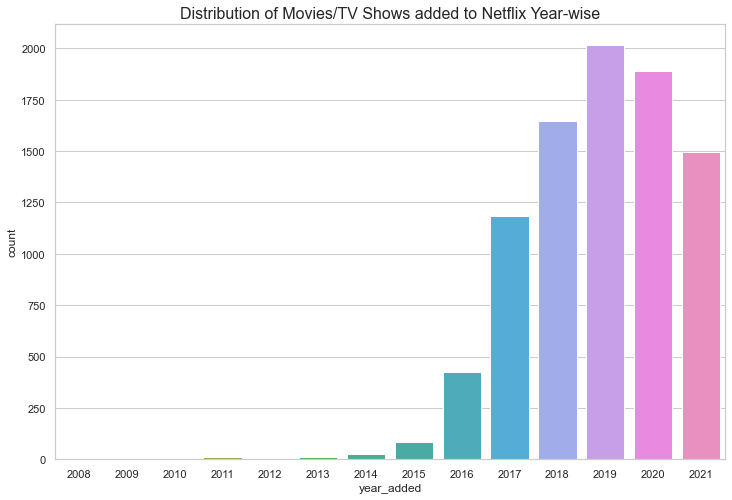

In [410]:
#Distribution of tv shows/movies added year-wise
print(netflix_df["year_added"].value_counts())

plt.figure(figsize = (12,8))
sns.set(style="whitegrid")
plt.title("Distribution of Movies/TV Shows added to Netflix Year-wise",size=16)
sns.countplot(netflix_df['year_added'])